In [221]:
import tensorflow as tf
import keras.backend.tensorflow_backend as tfback
from tensorflow_probability import distributions as tfd
import random



# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist,fashion_mnist
import matplotlib.pyplot as plt

In [223]:

# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(out_X_train, out_y_train), (out_X_test, out_y_test)  = fashion_mnist.load_data()
 

In [235]:
 
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


out_X_train = out_X_train.reshape(out_X_train.shape[0], 1, 28, 28)
out_X_test = out_X_test.reshape(out_X_test.shape[0], 1, 28, 28)
out_X_train = out_X_train.astype('float32')
out_X_test = out_X_test.astype('float32')
out_X_train /= 255
out_X_test /= 255


# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

out_Y_train = np_utils.to_categorical(out_y_train, 10)
out_Y_test = np_utils.to_categorical(out_y_test, 10)
from keras import backend as K

# 7. Define model architecture
model = Sequential()
 
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


 
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=1, verbose=1)




C:\Users\lopezme\AppData\Local\Continuum\anaconda3\envs\goog2\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
C:\Users\lopezme\AppData\Local\Continuum\anaconda3\envs\goog2\lib\site-packages\ipykernel_launcher.py:49: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
60000/60000 [==============================] - 91s 2ms/step - loss: 0.3250 - accuracy: 0.9000


in distribution results
[[-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 ...
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]]
Out of distribution results
[[-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 ...
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]
 [-2.3101108 -2.2077117 -2.3163073 ... -2.2702155 -2.312006  -2.3118978]]


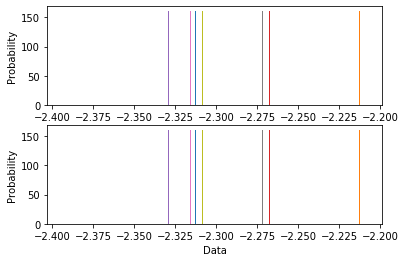

In [236]:
# Get probabilities for in-distrbution vs Out of Distrbution
Y_test = model.predict_proba(X_test)
log_Y_test  = np.log(Y_test)
print("in distribution results")
print(log_Y_test)

out_Y_test = model.predict_proba(out_X_test)
log_out_Y_test  = np.log(out_Y_test)
print("Out of distribution results")
print(log_out_Y_test)



# Demonstrate how in_dist and out_dist Overlap
plt.subplot(211)
plt.hist(log_Y_test, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

plt.subplot(212)
plt.hist(log_out_Y_test, density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data')

#attempt to perturb input image vector
for i in out_X_test:
    out_X_test_mut = i+1



In [228]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print('test loss, test acc:', results)

10000/10000 [==============================] - 6s 638us/step
test loss, test acc: [0.08072026148736478, 1.0]
